In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from data_processors.mongodb_store import MongoDbStore

In [3]:
real_deal_2011 = pd.read_pickle('./SoccerData/real_deal_2011.pkl')

In [4]:
real_deal_2011.columns

Index(['Match_ID', 'Unique_Team_ID', 'Unique_Team', 'Div', 'Season', 'Date',
       'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'date', 'daily_summary',
       'precip_intensity', 'rain'],
      dtype='object')

In [5]:
real_deal_2011['rainy_win'] = (real_deal_2011['FTR'] == 'H') & real_deal_2011['rain']

In [6]:
teams = real_deal_2011['HomeTeam'].unique()

In [12]:
len(teams)

36

Bayern Munich
Mainz
Braunschweig
Erzgebirge Aue
Frankfurt FSV
Wolfsburg
Hoffenheim
Schalke 04
M'gladbach
Hamburg
Freiburg
Nurnberg
Paderborn
Aachen
Dortmund
Stuttgart
FC Koln
Augsburg
Werder Bremen
Union Berlin
Kaiserslautern
Leverkusen
Karlsruhe
Cottbus
Fortuna Dusseldorf
Hannover
Bochum
Munich 1860
Hertha
Ingolstadt
Duisburg
Ein Frankfurt
St Pauli
Dresden
Hansa Rostock
Greuther Furth


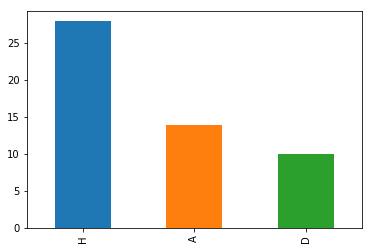

In [17]:
docs = []
for team in teams:
    this_team = real_deal_2011[real_deal_2011.HomeTeam == team]
    print(team)
    total_goals = sum(this_team['FTHG'])
    total_wins = this_team.groupby('FTR')['FTR'].count()['H']
    path = './images/{}.png'.format(team)
    fig = this_team['FTR'].value_counts().plot.bar()
    plt.savefig(path, format='png')
    f = open(path, 'rb')
    image = f.read()
    rain_win_percentage = round(this_team.rainy_win.mean()*100, 2)
    #rows.append([team, total_goals, total_wins, image, rain_win_percentage])
    my_json = {'team': team, 
               'total_goals': int(total_goals),
              'total_wings': int(total_wins), 
              'image': image,
              'rain_win_percentage': float(rain_win_percentage)}
    docs.append(my_json)
    
    

In [13]:
import pymongo

In [18]:
host = 'mongodb://127.0.0.1:27017/'
data_base = 'weather_data'
mdb_store = MongoDbStore(host, data_base)

In [19]:
mdb_store.store_many(data=docs, collection_name='berlin_games')

In [20]:
results = _

In [22]:
results

In [23]:
host = 'mongodb://127.0.0.1:27017/'
data_base = 'weather_data'

In [35]:
# Test loading image from mongodb.

In [31]:
from IPython.display import Image

In [24]:
berlin_coll = mdb_store.mongo_data_base['berlin_games']

In [25]:
query = berlin_coll.find({'name': 'Hamburg'})

In [32]:
query = berlin_coll.find_one({'team': 'Hamburg'}, {'image': 1})
image = query.get('image')

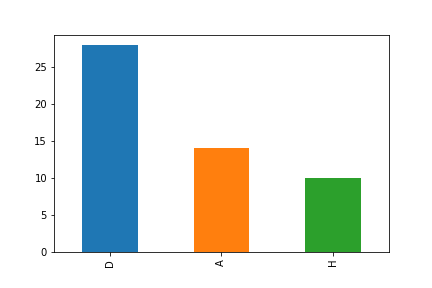

In [34]:
Image(image)

In [16]:
df = pd.DataFrame(rows, columns=['team', 'total_goals', 'total_wins', 'image', 'rain_win_percentag'])

In [18]:
df['json'] = df.apply(lambda x: x.to_json(), axis=1)

OverflowError: ('Unsupported UTF-8 sequence length when encoding string', 'occurred at index 0')